In [2]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

In [3]:
# Search for your target using its TIC ID 
TIC = 'TIC 95337971' 

In [4]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, author = 'SPOC');

In [5]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,95337971,0.0
1,TESS Sector 46,2021,SPOC,120,95337971,0.0


In [8]:
# Select multiple sectors based on the available data above.
sector45b = lk.search_lightcurve(TIC, sector=45).download();
sector45 = sector45b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_8724\3273642470.py:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector45 = sector45b.PDCSAP_FLUX.remove_nans();


In [10]:
sector46b = lk.search_lightcurve(TIC, sector=46).download();
sector46 = sector46b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_8724\2114340682.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector46 = sector46b.PDCSAP_FLUX.remove_nans();


<IPython.core.display.Javascript object>


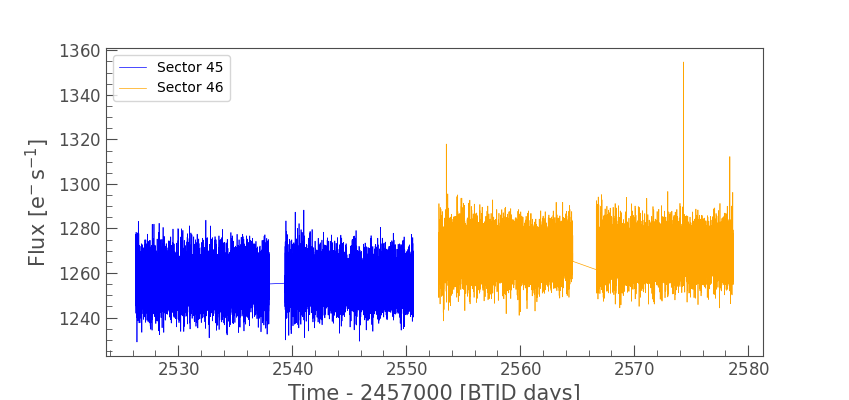

In [11]:
# Plot the light curves with the desired colors and highlighted sectors
ax = sector45.plot(label='Sector 45', color='blue');
sector46.plot(ax=ax, label = 'Sector 46', color='orange');
ax.legend();

In [12]:
collect_lc = lk.LightCurveCollection([sector45, sector46]).stitch();

<IPython.core.display.Javascript object>


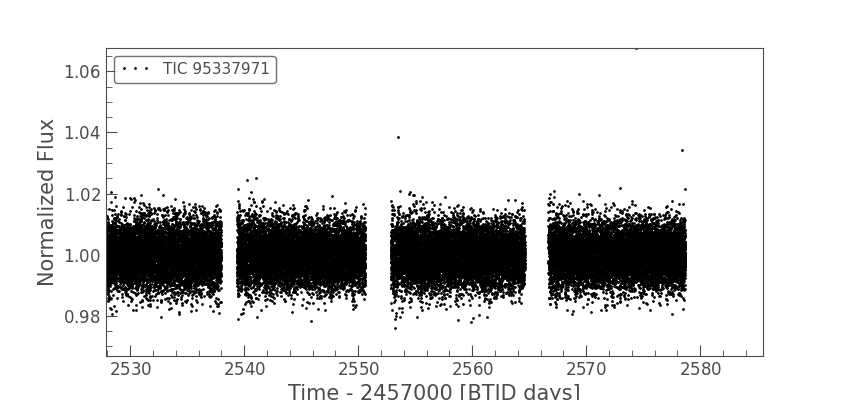

In [35]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


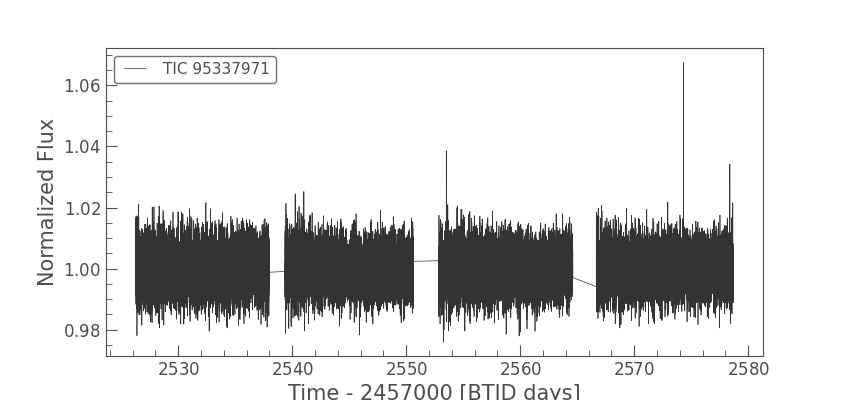

<IPython.core.display.Javascript object>


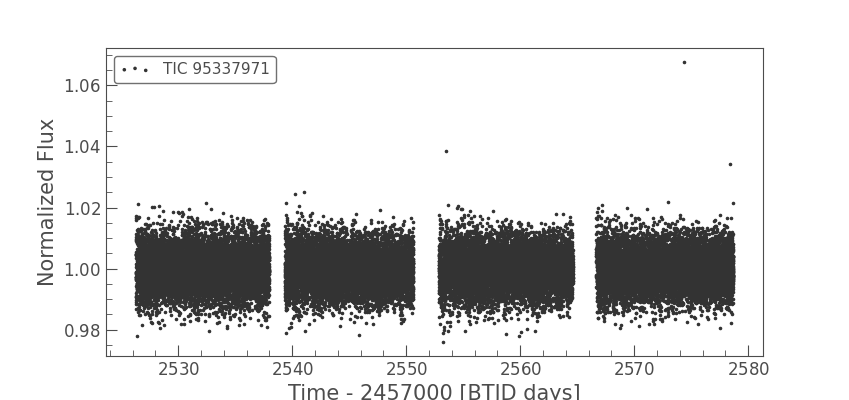

In [38]:
mask = ((collect_lc.time.value < 2580)&(collect_lc.time.value > 2520))
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);

<IPython.core.display.Javascript object>


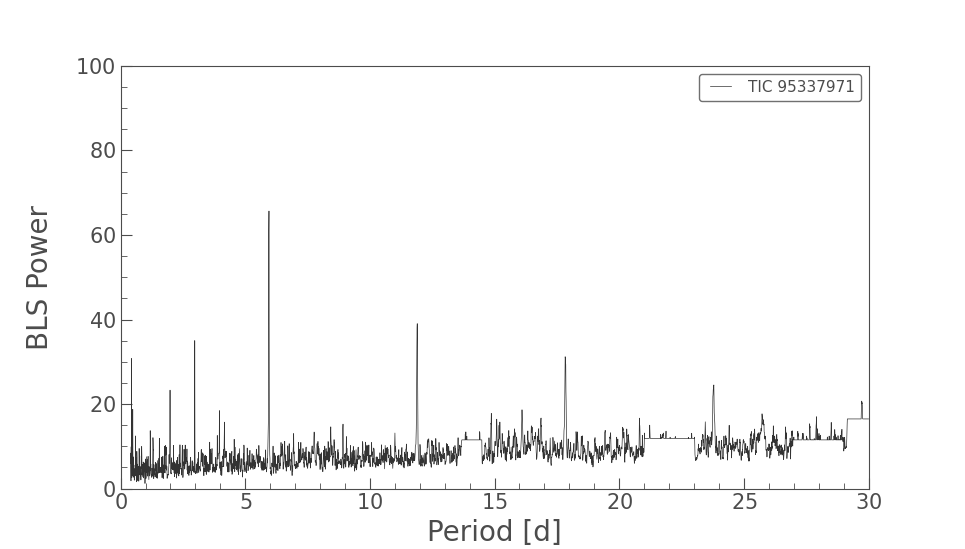

Period at max power = 5.950807508075081 d
BLS max power = 6.081280900312409
----------------------------------------
Period at second max power = 5.943011430114302 d
BLS max power = 8.400136687725754
----------------------------------------
Period at third max power = 5.958603586035861 d
BLS max power = 1.8440817714288424
----------------------------------------
Period at fourth max power = 11.899214992149922 d
BLS max power = 9.897651910389106
----------------------------------------
Period at fifth max power = 11.891418914189142 d
BLS max power = 2.6136425050613448
----------------------------------------
Period at sixth max power = 2.9727057270572708 d
BLS max power = 30.78625309402392
----------------------------------------
Period at seventh max power = 11.883622836228364 d
BLS max power = 3.6213750971278613
----------------------------------------
Period at eighth max power = 11.907011070110702 d
BLS max power = 3.196716970166542
----------------------------------------
Period at

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 780, 100000)
bls = masked_lc.to_periodogram(method='bls', period=period)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 100])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('----------------------------------------')

<IPython.core.display.Javascript object>


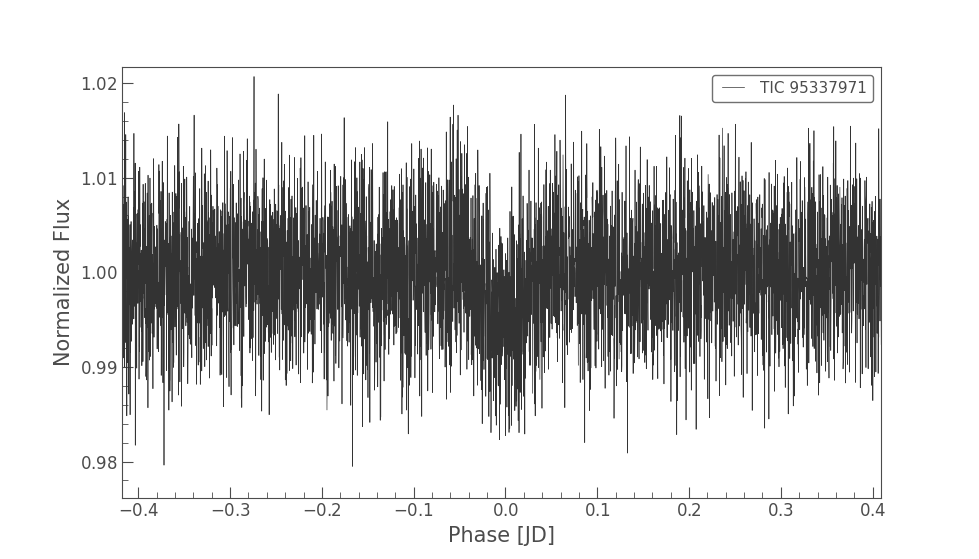

<IPython.core.display.Javascript object>


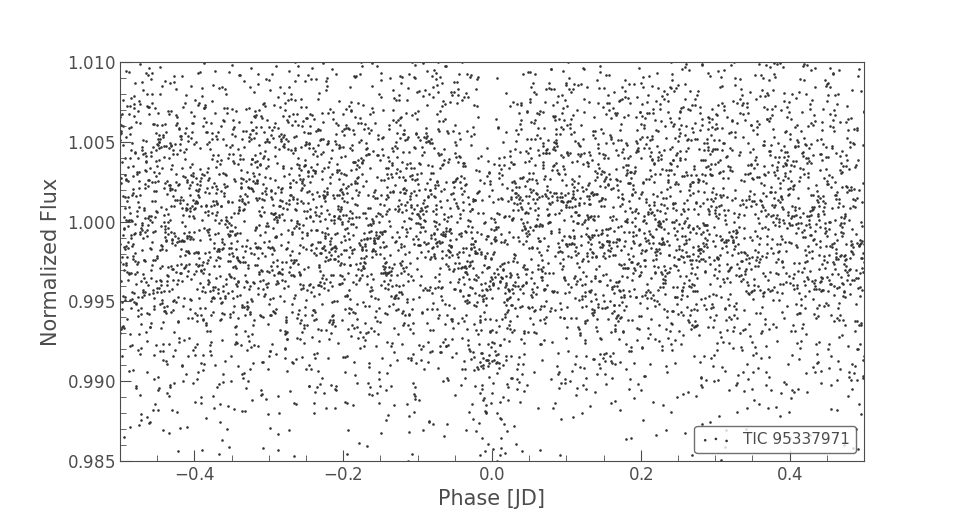

(0.985, 1.01)

In [44]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
folded_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)
folded_lc.plot();
folded_lc.scatter(s=3)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,0.5)
plt.ylim([0.985,1.01])

<IPython.core.display.Javascript object>


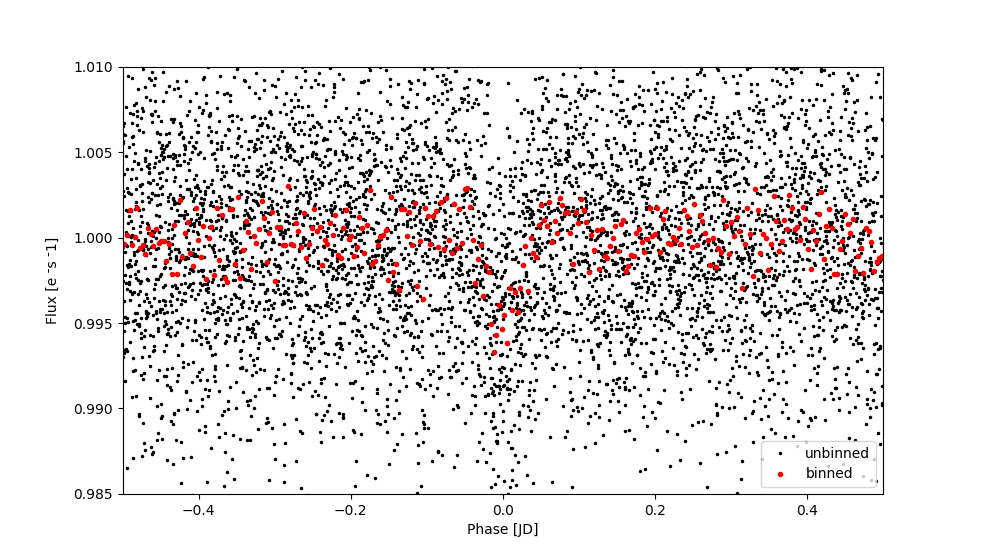

(0.985, 1.01)

In [46]:
period  = bls.period_at_max_power
t0 = bls.transit_time_at_max_power 

folded2_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,0.5)
plt.ylim([0.985,1.01])

In [47]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.9933192133903503
median flux = 0.9999725520610809
Tdepth =  0.006653338670730591
Tdepth in ppm =  6653.338670730591 ppm
Rp/Rs ratio =  0.08156800028645174


In [48]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [49]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 1.2000000000000002 d hours


In [50]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.004194282095803271
depth in ppm = 4194.282095803272 ppm


In [51]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

5.950807508075081 d
2531.719822398904
0.05 d


In [52]:
P = 5.950807508075081 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 0.58554 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 8043167670.315139 m
a = 8043167.670315139 km
a = 0.05376525404780886 AU
The planetary mass was neglected


In [53]:
L = 0.07118282 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 0.2543848551809925 AU
The outer boundary of the habitable zone ro = 0.36647947766166905 AU


In [55]:
Rs = 0.596885 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 33902.50771567054 km
Rp= 5.3213793306656 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 19.351521378254738


In [56]:
P = 3.8770507705077053 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 101078.93052473203 m/s


In [57]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  5.950807508075081 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  1.2000000000000002 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.006653338670730591
Transit depth in ppm =  6653.338670730591 ppm
Transit Depth from bls model in ppm = 4194.282095803272 ppm
Rp/Rs ratio =  0.08156800028645174
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 33902.50771567054 km
Rp= 5.3213793306656 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 19.351521378254738
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 101078.93052473203 m/s
- - - - - - - - - - - - - - - - - - - - 


In [58]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

Total transit duration T14 Tt = 0.09728351391829144 d
Tt in hours = 2.334804334038995 d hours
Impart parameter b = 0.7900671562278322
Inclination i = (88.4901783013117+0j) deg


In [59]:
lk.show_citation_instructions()